In [74]:
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']

# 正規分布

## 68-95-99.7ルール
μ ± σ 約68%<br>
μ ± 2σ 約95%<br>
μ ± 3σ 約99.7%〜100%<br>

In [54]:
loc = 4
scale = 3

group1 = []
group2 = []
group3 = []
samples = []
for _ in range(1000):
    sample = stats.norm(loc=loc, scale=scale).rvs() 
    if loc-scale < sample < loc+scale:
        group1.append(sample)
    elif loc-2*scale < sample < loc+2*scale:
        group2.append(sample)
    elif loc-3*scale < sample < loc+3*scale:
        group3.append(sample)
    samples.append(sample)


In [55]:
print(len(group1)/ len(samples))
print((len(group1) + len(group2)) / len(samples))
print((len(group1) + len(group2) + len(group3)) / len(samples))

0.683
0.959
0.999


In [53]:
len(samples)

1000

### 標準化

$z=\frac{x-\bar{x}}{s}$

各値から平均を引くと平均が0になる<br>
$\bar{x}=\frac{x_{1}+x_{2}・・・+x_{n}}{n}$<br>
$\bar{x} - \bar{x}=\frac{x_{1}+x_{2}・・・+x_{n}}{n} - \bar{x}$<br>
$0=\frac{x_{1}+x_{2}・・・+x_{n}}{n} - \frac{\bar{x}n}{n}$<br>
$0=\frac{(x_{1} -\bar{x}) +(x_{2} -\bar{x}) ・・・+(x_{n} -\bar{x})}{n}$<br>
$0=x  -\bar{x}$<br>

各値から平均を引いた値を標準偏差で割ると分散が1となる<br>
$s^2=\frac{1}{n}Σ^{n}_{i-1}(x_{i}-\bar{x})^2$ 平均は0なので$\bar{x}は消える$<br>
$s^2×\frac{1}{s^2}=\frac{1}{n}Σ^{n}_{i-1}(x_{i})^2×\frac{1}{s^2}$<br>
$1=\frac{1}{n}Σ^{n}_{i-1}( \frac{x_{i}}{s})^2$<br>
$1=x_{i}^2$

In [85]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df['tip_rate'].values.reshape(-1,1))

In [92]:
# scaler.fit_transform(df[['tip_rate','total_bill']])

In [94]:
# 偏差値
# scaled * 10 + 50

### 二項分布

ある観察や試行を複数回行った時に，ある事象が起こる回数が従う確率分布<br>
例）サイコロを3回投げて2がx回でる確率<br>

=サイコロを３回投げて2が1回出る組み合わせ×2が1回出る確率×2が2回でない確率

2がn回中x回でる組み合わせは $_{n}C_{x} = \frac{n!}{x!(n-x)}$<br>

これに2が出る確率をかける

ある事象が起こる確率pの試行をn回実施してその事象がx回起こる確率(P(x))は<br>
$P(x) = _{n}C_{x}p^xq^{n-x} = \frac{n!}{x!(n-x)}p^xq^{n-x}$<br>

ただしq = 1 - p

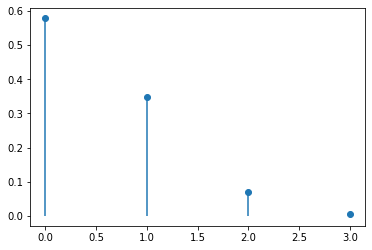

In [157]:
n = 3
x = np.arange(n+1)
y = stats.binom(n=n, p=1/6).pmf(x)
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

### 二項分布と正規分布
二項分布のnを無限大にした分布は正規分布に近似する<br>

平均np、分散npqの正規分布に近似できる<br>

例）サイコロを100回投げて2がx回出る確率<br>
100(=n)×$\frac{1}{6}$(=p)→17回が最も確率が高い

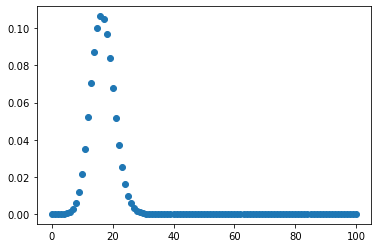

In [158]:
p = 1/6
n = 100
x = np.arange(n+1)

y = stats.binom(n=n, p=p).pmf(x)
plt.plot(x, y, 'o')


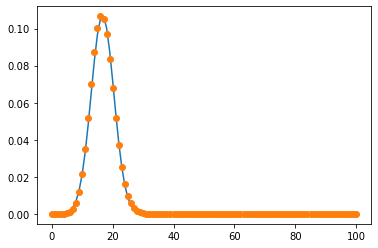

In [165]:
y2 = stats.norm(n*p, np.sqrt(n*p*(1-p))).pdf(x)
plt.plot(x, y2)
plt.plot(x, y, 'o')

In [131]:
# 平均
stats.binom(n, p).mean()

16.666666666666664

In [132]:
n*p

16.666666666666664

In [135]:
# 分散
stats.binom(n, p).var()

13.888888888888888

In [134]:
n*p*(1-p)

13.888888888888888